# Machine Learning linear models (lasso, ridge, polynomial)

# Ridge Regression

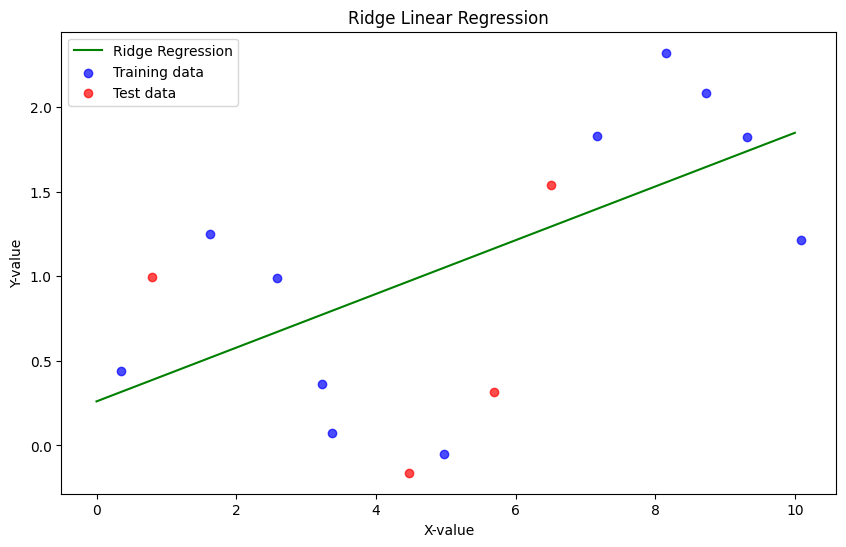

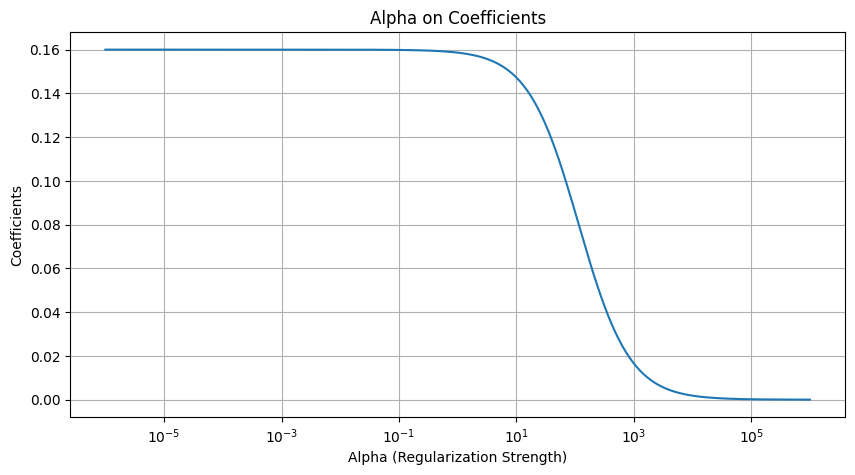

R^2 score for training data: 9.923712182469124e-05
R^2 score for test data: -0.47804181098680076


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# Your data generation code...
np.random.seed(0)
n = 15
x = np.linspace(0, 10, n) + np.random.randn(n) / 5
y = np.sin(x) + x/6 + np.random.randn(n) / 10
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
X_train, X_test = X_train.reshape(-1, 1), X_test.reshape(-1, 1)  # Reshaping for sklearn

# Train the Ridge Regression Model
ridge = Ridge(alpha=1).fit(X_train, y_train)
pred = ridge.predict(np.linspace(0, 10, 100).reshape(-1, 1))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, 10, 100), pred, label='Ridge Regression', color='green')
plt.scatter(X_train, y_train, label='Training data', color='blue', alpha=0.7)
plt.scatter(X_test, y_test, label='Test data', color='red', alpha=0.7)
plt.xlabel('X-value')
plt.ylabel('Y-value')
plt.title('Ridge Linear Regression')
plt.legend()
alphas = np.logspace(-6, 6, 200)
coefficients = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha).fit(X_train.reshape(-1,1), y_train)
    coefficients.append(ridge.coef_)

plt.figure(figsize=(10,5))
plt.plot(alphas, coefficients)
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Coefficients')
plt.title('Alpha on Coefficients')
plt.grid(True)
plt.show()

train_score = ridge.score(X_train.reshape(-1,1), y_train)
test_score = ridge.score(X_test.reshape(-1,1), y_test)

print(f'R^2 score for training data: {train_score}')
print(f'R^2 score for test data: {test_score}')

## Lasso regression

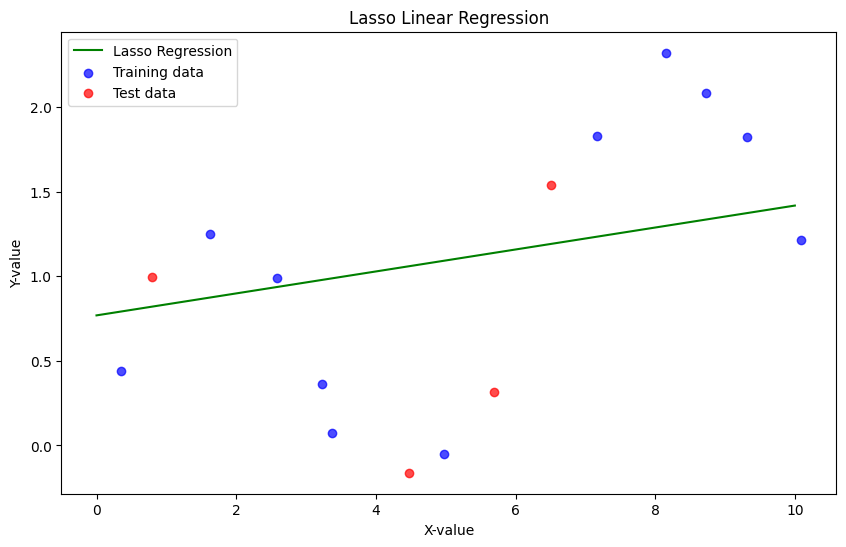

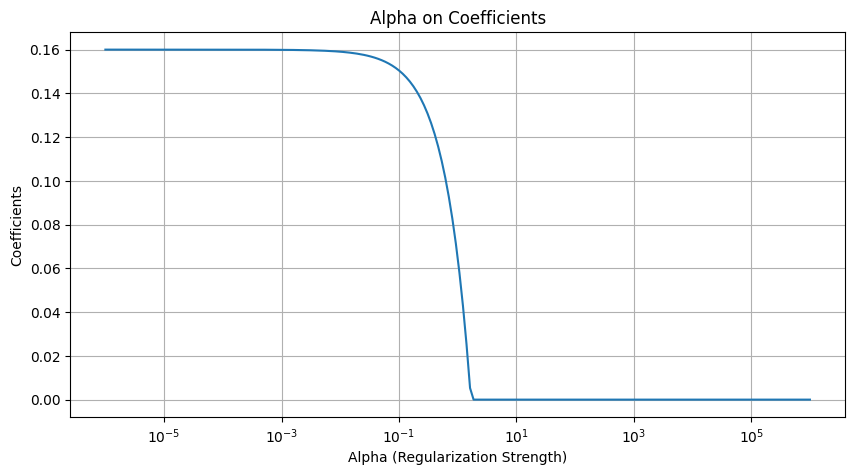

R^2 score for training data: 0.0
R^2 score for test data: -0.4780864173714179


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

# Your data generation code...
np.random.seed(0)
n = 15
x = np.linspace(0, 10, n) + np.random.randn(n) / 5
y = np.sin(x) + x/6 + np.random.randn(n) / 10
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
X_train, X_test = X_train.reshape(-1, 1), X_test.reshape(-1, 1)  # Reshaping for sklearn

# Train the Ridge Regression Model
lasso = Lasso(alpha=1).fit(X_train, y_train)
pred = lasso.predict(np.linspace(0, 10, 100).reshape(-1, 1))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, 10, 100), pred, label='Lasso Regression', color='green')
plt.scatter(X_train, y_train, label='Training data', color='blue', alpha=0.7)
plt.scatter(X_test, y_test, label='Test data', color='red', alpha=0.7)
plt.xlabel('X-value')
plt.ylabel('Y-value')
plt.title('Lasso Linear Regression')
plt.legend()
alphas = np.logspace(-6, 6, 200)
coefficients = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha).fit(X_train.reshape(-1,1), y_train)
    coefficients.append(lasso.coef_)

plt.figure(figsize=(10,5))
plt.plot(alphas, coefficients)
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Coefficients')
plt.title('Alpha on Coefficients')
plt.grid(True)
plt.show()

train_score = lasso.score(X_train.reshape(-1,1), y_train)
test_score = lasso.score(X_test.reshape(-1,1), y_test)

print(f'R^2 score for training data: {train_score}')
print(f'R^2 score for test data: {test_score}')

## Polynomial regression

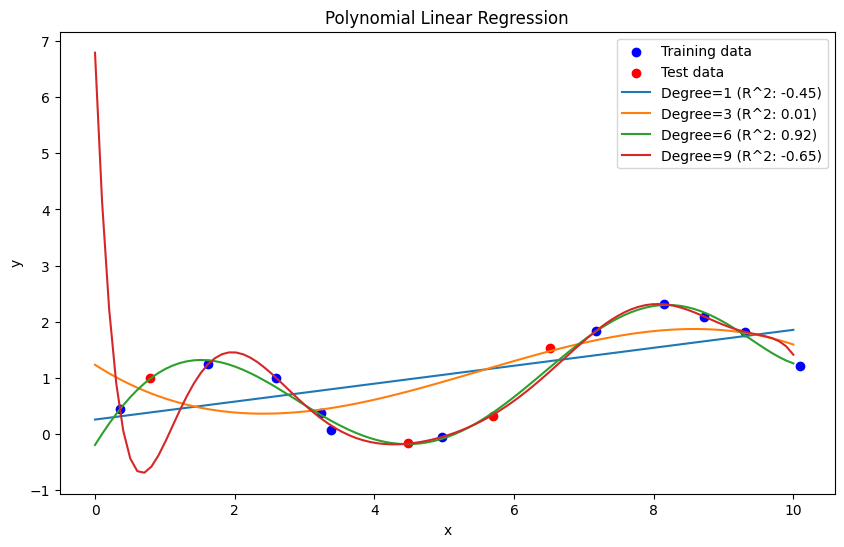

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Your data generation code
np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x) + x/6 + np.random.randn(n)/10
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

# Define the degrees for which polynomial regression is to be performed
degrees = [1, 3, 6, 9]

plt.figure(figsize=(10, 6))

# Plot training and testing points
plt.scatter(X_train, y_train, label='Training data', color='blue')
plt.scatter(X_test, y_test, label='Test data', color='red')

# Fit and plot polynomial regression for each degree
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    linreg = LinearRegression().fit(X_train_poly, y_train)
    
    x_plot = np.linspace(0, 10, 100).reshape(-1, 1)
    y_plot = linreg.predict(poly.transform(x_plot))
    
    plt.plot(x_plot, y_plot, label=f'Degree={degree} (R^2: {r2_score(y_test, linreg.predict(X_test_poly)):.2f})')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Linear Regression')
plt.legend()
plt.show()